In [ ]:
import numpy as np     # for vectorization and parallel calculation
import pandas as pd    # for preprocessing dataset
import matplotlib.pyplot as plt    # for visualization
from sklearn.preprocessing import StandardScaler         #for normalization
from sklearn.model_selection import train_test_split     # splitting dataset into train and test using sklearn

importing relative modules for preprocessing dataset and implementing linear regression.
numpy for vectorization and parallel calculation
pandas for preprocessing the dataset
matplotlib for visualization and plot


In [ ]:
def cost(x,y,w,b):  #calculating cost function(mean square error for linear regression)
    cost=0
    m=x.shape[0]
    for i in range(m):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    cost=cost/2*m
    return cost

calculating cost function(mean square error for linear regression)  to figure out whether the best fit occurs to training data.

In [ ]:
def gradient(x,y,w,b):      # getting derivatives of w and b with respect to cost function (w and b are both scalar)
    dj_db=0
    m=x.shape[0]
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=f_wb-y[i]
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i
    dj_dw= dj_dw/m
    dj_db= dj_db/m
    return  dj_dw,dj_db

calculating the derivatives of w and b with respect to cost function(j) to get global minimum of cost function by optimum w and b.

In [ ]:
def gradient_descent(x, y, w, b, alpha,iter_num): #  implementing gradient descent to get optimum w and b

    p=[[w,b]]
    j=cost(x,y,w,b)
    j_converge=[]
    p_converge=[]
    derivative=[]
    for i in range(iter_num):
        dj_dw,dj_db=gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        step=1000*np.arange(10)
        if i in step:
              j_converge.append(cost(x,y,w,b))
              p_converge.append([w,b])
              derivative.append([dj_dw,dj_db])
        if i==9000:
            break
    print(f'converged cost:  {j_converge}\nconverged model parameters:  {p_converge}\n the derivatives : {derivative}')
    return w,b

implementing gradient descent optimization to achieve the best w and b to get global minimum of cost function.
this function returns best w and b to fit training data.

In [ ]:
def predict(x,w,b): # predicting the output using  test feature  and w and b achieved by gradient descent
    y_pred=w*x+b
    return y_pred

predicting the output using  test feature  and w and b achieved by gradient descent

In [ ]:
df=pd.read_csv('test.csv')

In [ ]:
df.isna().sum() # get the  total number of nan data type in dataset

x    0
y    0
dtype: int64

In [ ]:
df.head() # presenting the first 5 rows of dataset

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
df.dropna() # removing nan data type to be able to implement regression

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [ ]:
x=df['x']   # defining the feature
y=df['y']   # definig the output


the indices are based on the name of column of features in dataset.

In [ ]:
#model=StandardScaler()
#x_scaled=model.fit_transform(np.array(x).reshape(-1,1))
#y_scaled=model.fit_transform(np.array(y).reshape(-1,1))
def z_score(x):
    import statistics

    mean = sum(x) / len(x)
    deviation = statistics.stdev(x)
    normalized=(np.array(x)-mean)/deviation
    return normalized

implementing normalization using z score method by knowing the mean and deviation of feature.

In [ ]:
x_scaled=z_score(x)
y_scaled=z_score(y)

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.15)
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    # Shuffle the indices
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)

    # Split the data based on the shuffled indices
    X_train = X[indices[:-test_size]]
    X_test = X[indices[-test_size:]]
    y_train = y[indices[:-test_size]]
    y_test = y[indices[-test_size:]]

    return X_train, X_test, y_train, y_test

splitting the dataset into test and train to make sure whether the fitting works properly .

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.15)

In [ ]:
w,b=gradient_descent(x_train,y_train,220,50,0.01,9000)

converged cost:  [array([1.60347564e+09]), array([346.93858504]), array([343.5545294]), array([343.55452939]), array([343.55452939]), array([343.55452939]), array([343.55452939]), array([343.55452939]), array([343.55452939])]
converged model parameters:  [[array([217.82567792]), array([49.4603756])], [array([1.00336668]), array([-0.00386003])], [array([0.99311931]), array([-0.00421222])], [array([0.99311881]), array([-0.00421215])], [array([0.99311881]), array([-0.00421215])], [array([0.99311881]), array([-0.00421215])], [array([0.99311881]), array([-0.00421215])], [array([0.99311881]), array([-0.00421215])], [array([0.99311881]), array([-0.00421215])]]
 the derivatives : [[array([217.43220833]), array([53.9624396])], [array([0.0102396]), array([0.00054463])], [array([4.98978541e-07]), array([-6.20442662e-08])], [array([2.50590132e-11]), array([-6.91408924e-12])], [array([5.51639344e-15]), array([-4.72933239e-16])], [array([5.52077447e-15]), array([-3.89666513e-17])], [array([5.5207744

In [ ]:
y_pred=predict(x_test,w,b)

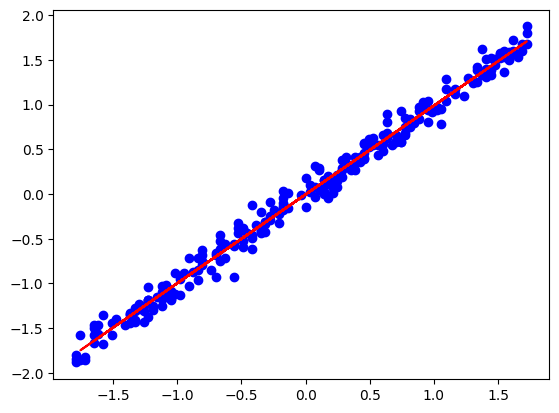

In [ ]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_pred,color='red')

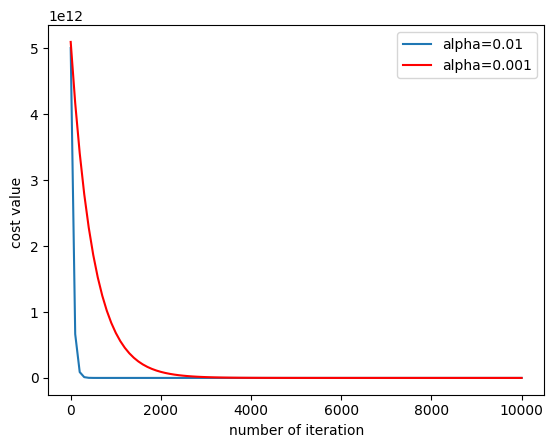

In [ ]:
step=range(0,10001,100) # plotting the decrease of cost function by increasing the number of iteration
iter_num=10000
alpha1=0.01
alpha2=0.001
w_init1=1250
b_init1=12444
w_init2=1250
b_init2=12444
j_converge1=[]
j_converge2=[]
for i in range(iter_num+1):
    dj_dw,dj_db=gradient(x_train,y_train,w_init1,b_init1)
    w_init1=w_init1-alpha1*dj_dw
    b_init1=b_init1-alpha1*dj_db
    if i in step:
       j_converge1.append(cost(x_train,y_train,w_init1,b_init1))
    dj_dw,dj_db=gradient(x_train,y_train,w_init2,b_init2)
    w_init2=w_init2-alpha2*dj_dw
    b_init2=b_init2-alpha2*dj_db
    if i in step:
       j_converge2.append(cost(x_train,y_train,w_init2,b_init2))
plt.plot(step,j_converge1,label='alpha=0.01')
plt.plot(step,j_converge2,color='red',label='alpha=0.001')
plt.xlabel('number of iteration')
plt.ylabel('cost value ')
plt.legend()

as shown in figure, its note that by increasing the learnig rate(alpha) the cost function approaches to zero more intensive but on the other side ,the potential to diversity  increases.